# 필요 라이브러리 호출하기

pandas, numpy 등 데이터 읽기에 필요한 라이브러리를 호출해줍니다. 

In [1]:
#필요 라이브러리 호출
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 파일 읽기

pandas의 read_csv를 활용하여 csv 파일을 데이터프레임 형태로 불러옵니다.

In [2]:
#파일 불러오기
data = pd.read_csv("./FIFA.csv", 
                  index_col = None)

In [3]:
df = data.copy()

## 데이터 구조 확인

                                                      <데이터 변수 설명>

| 변수 | 설명 
| --- | --- | 
| id | 선수 고유의 아이디 |  
| name | 이름 |
| age | 나이 |
| continent | 선수들의 국적이 포함되어 있는 대륙 | 
| contract_until | 선수의 계약기간 만료시기 |  
| position | 선수가 선호하는 포지션 ex) 공격수, 수비수|  
| prefer_foot | 선수가 선호하는 발 ex) 오른발 |  
| reputation | 선수가 유명도 - 높은 수치일 수록 유명한 선수 |  
| stat_overall | 선수의 현재 능력치 |  
| stat_potential | 선수가 경험 및 노력을 통해 발전할 수 있는 정도 |  
| stat_skill_moves | 선수의 개인기 능력치 |  
| value | FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) |  


df.head(), df.describe(), df.info()로 전반적인 데이터프레임의 구조를 확인해볼 수 있습니다. 

In [4]:
# dataframe.head()
# 데이터프레임 상위 5개 행 확인
df.head(5)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,11784.0,T. Lindenhahn,27,europe,2021,DF,?,1,63.0,63.0,3,300000
1,2436.0,V. Misidjan,24,europe,2021,MF,?,1,74.0,77.0,3,7000000
2,8196.0,S. Aresti,32,europe,2020,GK,?,1,67.0,67.0,1,450000
3,16446.0,H. Al Ruwaili,23,asia,2020,DF,?,1,53.0,60.0,2,70000
4,7388.0,E. Soriano,29,europe,2019,ST,?,1,67.0,67.0,2,750000


**과제 1: 데이터프레임 하위 7개 행을 확인해보세요!**

In [5]:
# 데이터프레임 하위 7개 행 확인
df.tail(7)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
8925,7805.0,C. Sepúlveda,26,south america,2019,MF,right,1,67.0,72.0,2,850000
8926,10746.0,I. Abass,19,africa,2023,ST,right,1,64.0,77.0,3,850000
8927,5424.0,D. Odoi,30,europe,2019,DF,right,1,69.0,69.0,3,775000
8928,16664.0,M. Tilio,16,oceania,2019,MF,left,1,52.0,69.0,2,100000
8929,13515.0,V. Myhra,21,europe,2018,GK,right,1,61.0,72.0,1,350000
8930,876.0,R. Vormer,30,europe,2022,MF,right,2,78.0,78.0,3,9500000
8931,13317.0,H. Eisa,25,africa,2019,ST,right,1,61.0,NaN,2,350000


# 결측치 처리

## 결측치 확인
dataframe.info()를 통해서 데이터프레임의 자료형, 결측치 개수를 알 수 있습니다.

In [6]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8756 non-null   float64
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   int64  
 8   stat_overall      8802 non-null   float64
 9   stat_potential    7140 non-null   float64
 10  stat_skill_moves  8932 non-null   int64  
 11  value             8932 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [7]:
# 결측치 확인
df.isnull().sum()

id                   176
name                   0
age                    0
continent              0
contract_until         0
position               0
prefer_foot            0
reputation             0
stat_overall         130
stat_potential      1792
stat_skill_moves       0
value                  0
dtype: int64

- df.info(), df.isnull().sum으로 확인해 본 결과, id, stat_overall, stat_potential에 결측치가 존재하는 것을 알 수 있습니다.<br>
- name, continent, contract_until, position, prefer_foot의 데이터 타입인 object는 pandas에서 문자열 type라고 생각해주시면 됩니다.<br>

그럼 결측치가 존재하는 id, stat_overall, stat_potential의 결측치를 처리하는 과정을 각각 진행해보도록 하겠습니다.

**과제2: describe을 활용해 데이터의 평균, 4분위수, 최소값, 최대값을 확인해보세요!** 

In [8]:
#데이터프레임 각 칼럼의 통계치 확인
df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8756.000000,8932.000000,8932.000000,8802.000000,7140.000000,8932.000000,8.932000e+03
mean,7972.833029,25.209136,1.130878,67.100091,72.003081,2.401702,2.778673e+06
std,4842.075657,4.635515,0.423792,6.854393,5.981808,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3755.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7707.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12084.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


## id
id column은 value를 예측하는데 도움이 되지 않기 때문에 해당 column 전체를 삭제합니다.<br>


**과제 3: id column 전체를 삭제해보세요!(Hint: df.drop을 활용해보세요)**

In [9]:
df.drop(['id'], axis = 1, inplace = True)

## prefer_foot

value_counts를 통해 prefer_foot의 value 및 결측치의 개수를 확인하고, 최빈값으로 대체함으로써 결측치를 처리해줍니다.

In [10]:
df['prefer_foot'].value_counts()

right    6452
left     1980
?         500
Name: prefer_foot, dtype: int64

**과제 4: 결측치를 최빈값으로 대체해보세요!**

In [11]:
#결측치를 최빈값인 right로 대체
df = df.replace({'prefer_foot' :'?'}, 'right')

In [12]:
#결측치 처리 확인
df[['prefer_foot']].value_counts()

prefer_foot
right          6952
left           1980
dtype: int64

## stat_potential
stat_potential, stat_overall 간의 관계를 파악하고, 상관계수가 높다면 각각의 값을 이용하는 방법으로 결측치를 처리해줍니다.

상관관계를 확인할 때, 시각화를 이용하기 위해 시각화를 위한 라이브러리를 불러옵니다.

In [13]:
#시각화를 위해 matplotlib 호출

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

scatter plot, heatmap을 이용해 두 변수 간 상관관계를 확인해줍니다.

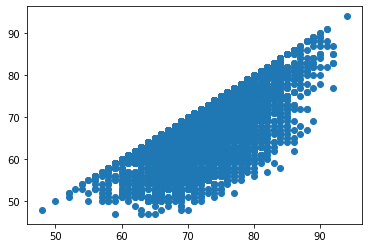

In [14]:
# scatterplot을 통해 상관관계 확인

plt.scatter(df.stat_potential, df.stat_overall)

<AxesSubplot:>

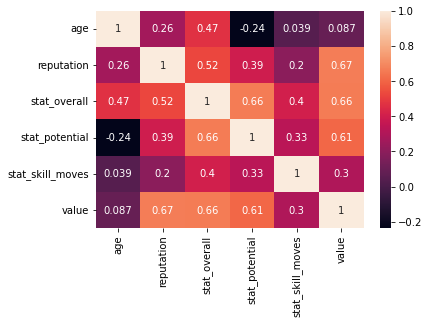

In [15]:
# heatmap을 통해 상관계수 파악

sns.heatmap(df.corr(),
            annot = True)

- scatter plot을 봤을 때 두 변수간 선형 관계가 존재하고, heatmap에서도 상관계수가 0.66임을 알 수 있기 때문에 각각의 값으로 대체함으로써 결측치를 처리해줍니다.

In [16]:
df1=df.groupby('name')['stat_overall'].transform("mean")
display(df1)

0       63.0
1       74.0
2       67.0
3       53.0
4       67.0
        ... 
8927    69.0
8928    52.0
8929    61.0
8930    78.0
8931    61.0
Name: stat_overall, Length: 8932, dtype: float64

In [17]:
#각각의 값으로 대체

df = df.fillna({'stat_potential':df['stat_overall']})
df = df.fillna({'stat_overall':df['stat_potential']})

In [18]:
#결측치 처리 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8932 non-null   object 
 1   age               8932 non-null   int64  
 2   continent         8932 non-null   object 
 3   contract_until    8932 non-null   object 
 4   position          8932 non-null   object 
 5   prefer_foot       8932 non-null   object 
 6   reputation        8932 non-null   int64  
 7   stat_overall      8912 non-null   float64
 8   stat_potential    8912 non-null   float64
 9   stat_skill_moves  8932 non-null   int64  
 10  value             8932 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 767.7+ KB


-  stat_overall과 stat_potential 모두 결측치가 존재하는 row는 20개입니다. 따라서, 최종적으로 결측치 20개가 존재합니다.
-  값을 삭제해도 모델 학습에 큰 무리가 없으므로, 해당 row를 삭제함으로써 결측치를 처리해줍니다.

In [19]:
#결측치 삭제
df.dropna(how = 'any', inplace = True)

In [20]:
#결측치 처리 결과 확인
df.isnull().sum()

name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

# EDA

우선, EDA를 위해 시각화에 필요한 라이브러리를 호출해줍니다.

In [23]:
#시각화 라이브러리 호출


먼저 position별 value의 변화를 나타내주는 factorplot을 그려줍니다.

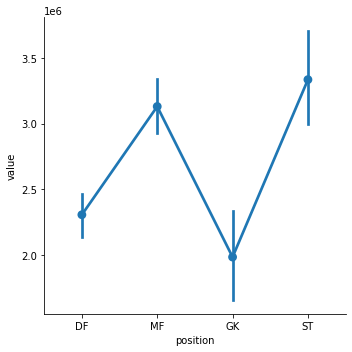

In [24]:
# position별 value의 변화 알아보기


다음으로, position별 value를 reputation별로 알아보는 EDA를 진행해보도록 하겠습니다.

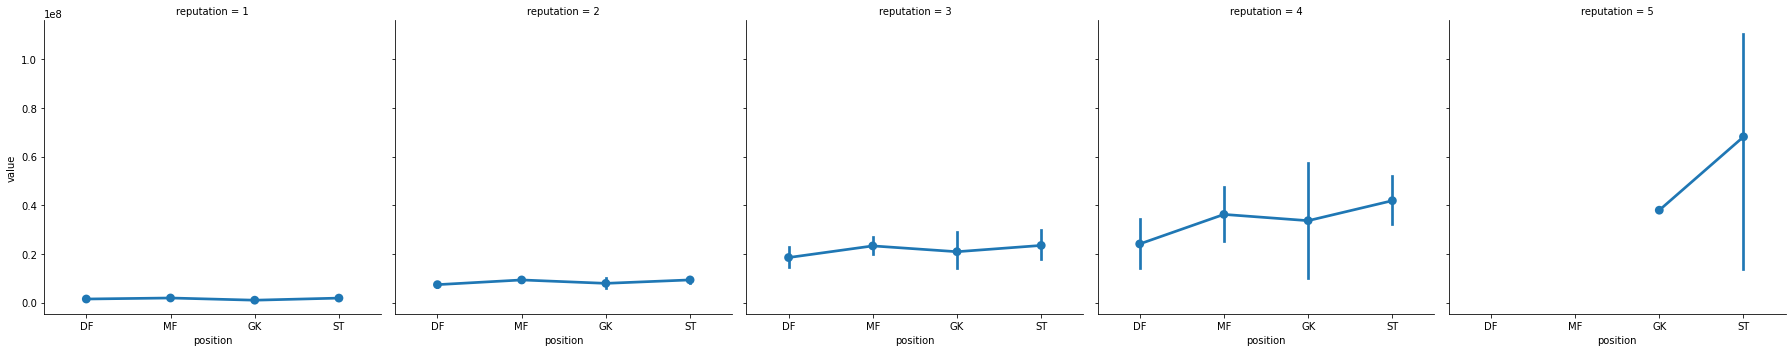

In [25]:
# reputation별로 position별 value의 변화 알아보기



**과제 5: 위의 그래프와 같이, position별 stat_skill_moves의 변화를 알아보기 위해 두 변수 간 factorplot을 그려보세요!**

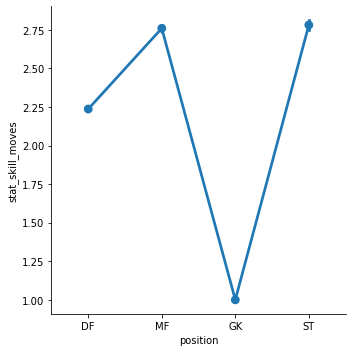

<AxesSubplot:xlabel='value', ylabel='Density'>

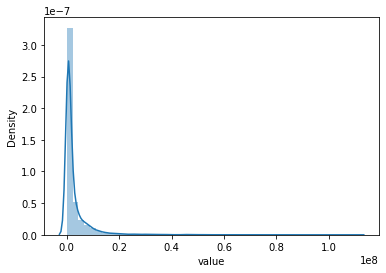

<AxesSubplot:xlabel='stat_potential', ylabel='Density'>

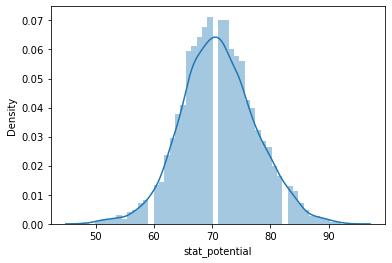

**과제 6: 다음으로 position 별 선수의 수를 나타내주는 PieChart와, position별 선수가 선호하는 발의 수를 나타내주는 CountPlot을 함께 그려보세요!**

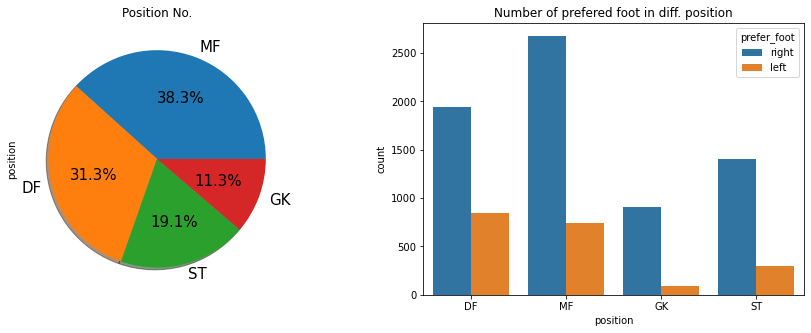